<a href="https://colab.research.google.com/github/Thony2311/IA/blob/main/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <p align=center>**Regresión Lineal. Miniproyecto 1 Fundamentos y Aplicaciones de I.A.**

---


#### <p align=center>Anthony Alzate Muriel
#### <p align=center>2019

### Introducción

<p align=justify>La regresión lineal es un método bastante conocido dentro del ambito de la estadística ya que permite generar un modelo lineal que predice el comportamiento de una variable de salida de acuerdo a las variables que afectan el comportamiento de dicha salida. Así mismo el Machine Learning usa este método estadístico para así poder aprender de los datos y posteriormente tener la capacida de generar alguna predicción. Para este caso específico, se usó una base de datos en donde la salida es el precio de las casas en Taiwan, dicho valor es influcidado por diferentes variables que se especificarán más adelante y lo que se pretende con la inteligencia artifical, es obtener un modelo ajustado que realmente pueda predecir el precio de las casas en relación con la varaibilidad de las variables independientes; sin embargo, no siempre se puede obtener un modelo ajustado que realmente pueda dar una predicción exacta, para eso existen algunas métricas que permiten determinar si el modelo ajustado encontrado realmente es fiable o no, dichas métricas se expondran e interpretarán a lo largo del documento. de igual manera, se usarán diferentes métodos para generar el modelo ajustado.

### Importar librerías






<p align=justify>Se importan las librerías necesarias para poder llevar a cabo cada una de las acciones a lo largo del código.



<p align=justify>La libreria numpy y pandas nos permite operar de mejor manera con los valores del dataset, tanto en visualización como en operaciones matemáticas etc.
La librería seaborn nos permite una mejor visualización de los gráficos en cuanto a datos estadísticos se refiere.
La librería matplotlib la cual se usará para la visualización de los datos en los gráficos de puntos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Información sobre el Data Set

<p align=justify>Se usó el  Real Estate Valuation data set Data Set, el cual nos proporcionaba información de un bien inmobiliario, en este caso el valor de las casas en Taiwan y las variables que influían sobre el precio de las casas.

<p align=justify>A continuación se muestran las variables y sus respectivas unidades de medición. (Dichas variables representan nuestras entradas o variables independientes)

<p align=justify>Para poder trabajar mejor con cada una de las variables entrada y la variable de salida, se optó por usar convenciones para refererirse a ellas, es por esto que al final de cada variable hay algunas letras en mayúscula, para que se entienda que en las próximas líneas del código se usarán dichas convenciones.

Entradas:


*   X1 = the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)   TD
*   X2 = the house age (unit: year) HA
*   X3 = the distance to the nearest MRT station (unit: meter)  MRT
*   X4 = the number of convenience stores in the living circle on foot (integer)  CS
*   X5 = the geographic coordinate, latitude. (unit: degree)   LT
*   X6 = the geographic coordinate, longitude. (unit: degree)   LG

<p align=justify>La salida o variable dependiente como se mencionó, es el precio del inmueble, las unidades son presentadas a continuación.

Salida

*  Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)  HP







###  Importar datos desde Drive

<p align=justify> Para importar el Dataset, se descargaron los datos de la página del dataset mencionado anteriormente, dichos datos fueron cargados al drive y con los comandos mostrados a continuación se puede enlazar los archivos del Drive con el Google colab para así poder trabajar con el dataset.

<p align=justify>El nombre que se le puso a todo ese "arreglo de datos" fue el de 'Dataset', por eso de ahora en adelante, cada vez que se requiera extraer alguna columna o un dato se hará mención a 'Dataset'.

<p align=justify>También se puede apreciar las columnas correspondientes a las variables independientes mencionadas anteriormente y la columna correspondiente a la variable de salida. (Cabe resaltar que las columnas tienen los nombres según las convenciones mencionadas anteriormente, las 6 primeras columnas corresponden a las variables independientes y la última columna corresponde a la salida, en este caso el precio de la casa.)

<p align=justify>Para términos de verificación, se muestran solo las 10 primeras filas del Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
Dataset=pd.read_excel('/content/drive/MyDrive/Datos/Data_set_Parcial1.xlsx')
Dataset.head(10)

Mounted at /content/drive


,TD,HA,MRT,CS,LT,LG,HP
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


### Revisión de datos nulos

<p align=justify>Esta parte del código es muy importante, ya que permite hacer una revisión del Dataset y de esta manera determinar si se deben hacer algunas acciones para poder trabajar con él, lo primero que se hace, es saber si el Dataset está completo, es decir, si en todas las variables hay la misma cantidad de información ya que se hace necesario no tener celdas sin datos para poder hacer los trabajos de regresión.



In [3]:
total = Dataset.isnull().sum().sort_values(ascending=False)
porcen_1 =  Dataset.isnull().sum()/Dataset.isnull().count()*100
porcen_2 = (round(porcen_1, 1)).sort_values(ascending=False)
infonula = pd.concat([total,porcen_2], axis=1, keys=['Total','%'])
infonula.head(Dataset.size)

,Total,%
TD,0,0.0
HA,0,0.0
MRT,0,0.0
CS,0,0.0
LT,0,0.0
LG,0,0.0
HP,0,0.0


<p align=justify>Tal como se puede apreciar, todas las variables tienen la misma cantidad de datos, por lo que se debe hacer ninguna acción de más para poder trabajar con este Dataset

<p align=justify>Luego de esto, se procede a revisar las caracteristicas del Dataset con el comando 'info' como se muestra a continuación. Esto con el fin de conocer el tipo de datos que tiene cada una de las columnas y para conocer el total de datos que hay en cada columna.

In [4]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TD      414 non-null    float64
 1   HA      414 non-null    float64
 2   MRT     414 non-null    float64
 3   CS      414 non-null    int64  
 4   LT      414 non-null    float64
 5   LG      414 non-null    float64
 6   HP      414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


<p align=justify>Como se puede observar, todos los datos son de tipo entero, por lo tanto, no se debe hacer alguna acción extra para trabajar con el Dataset y además se conoce que la cantidad de datos total es de 414, este valor es importante conocerlo, ya que nos permitirá hacer una buena distribución de los datos de entrenamiento y validación para la regresión lineal.

### Desviación y correlación de los datos

<p align=justify>Ahora se debe tener una descripción estadìstica de cada una de las variables del Dataset, tal como se aprecia a continuación; se puede observar los cuartiles de cada variable y su media aritmética, entre otros datos; estos valores de la media de cada una de las variables es muy importante, ya que a partir de dicho valor, se decide sí se debe o no, hacer una normalización de los datos, si la media de las variables están dentro de un rango muy grande (es decir, si algunas estan en unidades y en otras en centenas o miles) se debe hacer normalización de los datos para así poder realizar una regresión más precisa

In [5]:
Dataset.describe()

,TD,HA,MRT,CS,LT,LG,HP
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


<p align=justify>Como se puede apreciar en la tabla anterior, la media de las variables está dentro de un rango muy amplio, por ejemplo, la media de CS es del orden las unidades y la media de la MRT es del orden de los miles, por tanto se decide que se debe hacer normalización de los datos.

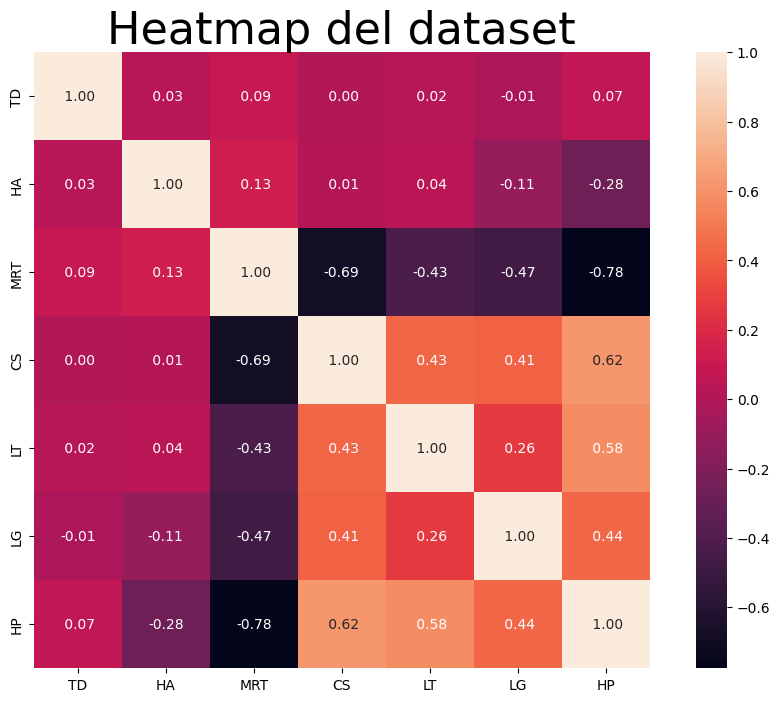

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
title = "Heatmap del dataset"
plt.title(title, fontsize=32)
ax.title.set_position([0.5,1.05])
correlacion = Dataset.corr(method="spearman")
sns.heatmap(correlacion,annot=True, fmt=" .2f", square=True)
plt.show()

<p align=justify>A través de un mapa de calor como el mostrado anteriormente, es posible conocer la correlación de cada una de las variables con las demás y con ellas mismas, es por esto que la diagonal principal es de 1 ya que se compara cada variable con ella misma. Dicha correlación, permitirá saber cuales serán las variables que se usarán para realizar la regresión lineal del Dataset.

<p align=justify>La fila que se debe tener en cuenta es la última, ya que muestra la correlación de la salida con cada una de las variables de entrada, está correlación muestra si realmente hay alguna proporcionalidad entre las variables en estudio, es decir entre la correlación más se acerque a 1 quiere decir que realmente el comportamaiento de las variables en estudio tiene alguna relación explicable.
Cabe aclarar que el signo de la correlación lo que indica es si la correlación es proporcional o inversamente proporcional.

<p align=justify>Por tanto, del Heatmap anterior, se puede deducir que las variables que realmente se pueden usar para realizar la regresión lineal del Dataset, son las variables de MRT, CS, LT y LG ya que son las que tienen una mayor correlación con la salida que es HP. Las demás variables no se escogen, ya que su correlación no es significativa y por tanto podrían  introducir ruido en la regresión lineal.

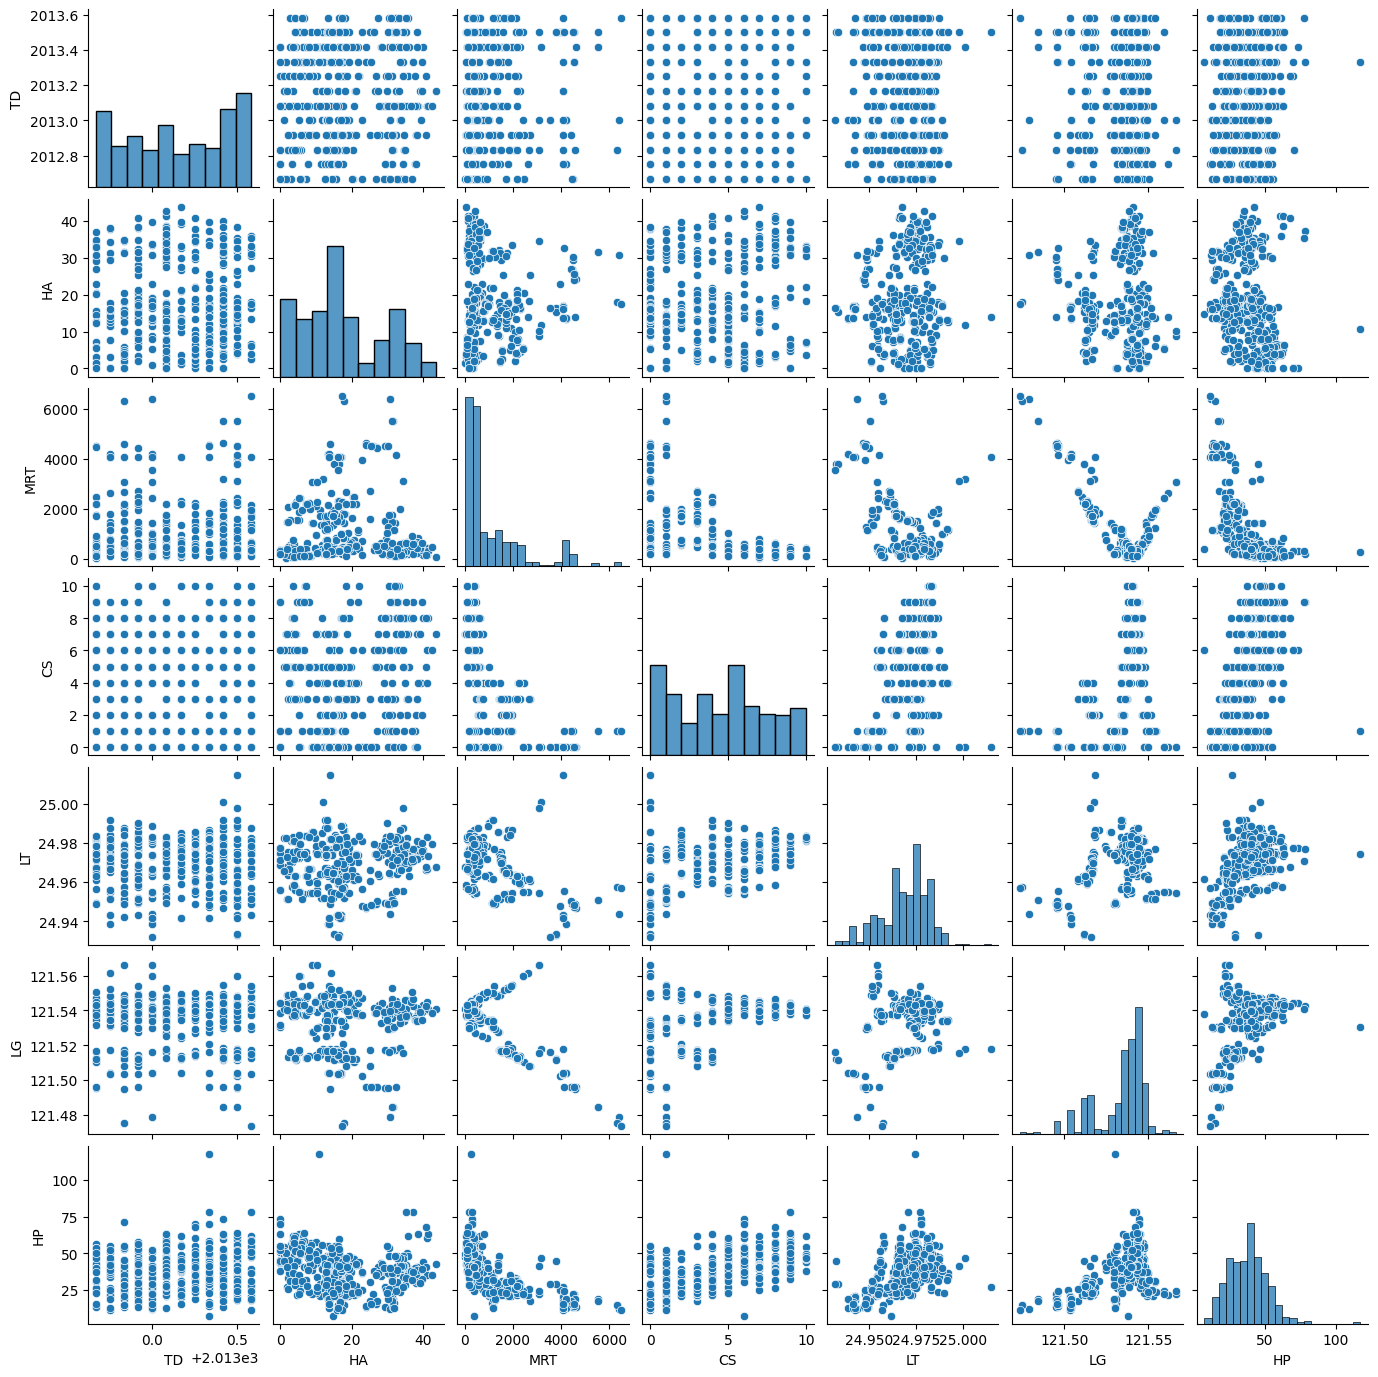

In [7]:
sns.pairplot(Dataset, height=2, aspect=1)


<p align=justify>A través del comando de pairplot de la librería seaborn se puede ver de manera gráfica la correlación de los datos mostrada numericamente con el Heatmap y además permite conocer la distribución de los datos, dicha distribución se puede observar en la diagonal principal y es muy importante detectar si los datos tienen o no una distribución de campana de Gauss o distribución normal porque así se definirá el comando que se tulizará para realizar la normalización de los datos.
<p align=justify>Como se puede observar los datos no tiene uuna distribucíon normal (es decir, que los datos formen la figura de una campana, uniforme y simétrica), por tanto se descarta el método de StandarScaler para normalizar, ya que este usa cuando los datos son están distribuidos de manera normal

## Normalización


<p align=justify>Para la normalización, se usa el método de MinMaxScaler de la librería de scikit-learn, ya que con dicho método se puede poner el rango dentro del cuál deseo que queden normalizados los datos.

<p align=justify>Cabe aclarar que la normalización consiste en transformar los valores de cada una de las variables a un rango determinado para que de esta manera pueda ser mucho más fácil el trabajo con los valores del Dataset, para este caso, el rango dentro del cual se encontrarán los valores es (-1, 1), es decir lo que hace la normlaización por ejemplo es que coge el valor max de la variable CS y lo pone en 1 y el mínimo lo pone en -1 y los valores intermedios los pone entre esos dos valores de manera escalar y proporcinal a su valor original; este mismo proceso lo hace con cada una de las variables independientes.

<p align=justify>Al usar la técnica de MinMaxScaler para normalizar, si no se le asigna un rango, este usará por defecto un rango entre (0, 1)

<p align=justify>Se debe dejar claro que la única variable que no se normaliza es la variable dependiente o salida, que en este caso es el precio de la casa.

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Variables estimadoras
scaler= MinMaxScaler(feature_range=(-1, 1))
scaler.fit(Dataset[['MRT','CS','LT','LG']])   #
xn = scaler.transform(Dataset[['MRT','CS','LT','LG']]) #
xn = np.array(xn)

# Variable a predecir
yn = Dataset['HP'].values
yn = yn.reshape(-1,1)   # Con el -1 se le indica al programa que él mismo calcule la cantidad de filas de dicho arreglo y con el 1 se le indica que solo habrá una columna
yn = np.array(yn)



print(xn.shape, yn.shape)
data_nor = np.append(xn,yn,1)
data_nor = pd.DataFrame(data_nor)
data_nor.columns = ['MRT','CS','LT','LG','HP'] #
data_nor.head(10)


(414, 4) (414, 1)


,MRT,CS,LT,LG,HP
0,-0.980975,1.0,0.233883,0.438646,37.9
1,-0.912381,0.8,0.169898,0.422903,42.2
2,-0.833370,0.0,0.342462,0.517792,47.3
3,-0.833370,0.0,0.342462,0.517792,54.8
4,-0.886402,0.0,0.146389,0.486306,43.1
5,-0.334333,-0.4,-0.249152,-0.158723,32.1
6,-0.814347,0.4,0.145419,0.356265,40.3
7,-0.918257,0.2,0.171837,0.482640,46.7
8,0.698055,-0.8,-0.542414,-0.761699,18.8
9,-0.455562,-0.4,-0.145904,-0.108691,22.1


Tal como se puede apreciar en la tabla anterior, los datos ya se encuentran normalizados con valores entre -1 y 1 y la salida sigue con los valores originales.

## División DataSet

<p align=justify>Con el comando de train_test_split de la librería de Scikit-learn se puede hacer una división del Dataset, esto se hace para separar los datos de Prueba de los datos de Valicación, tanto para entrenar el modelo como para comprobar el modelo de regresión lineal.

In [9]:
from sklearn.model_selection import train_test_split
X_prueba_n, X_valida_n, Y_prueba_n, Y_valida_n = train_test_split(data_nor[['MRT','CS','LT','LG']], data_nor[['HP']], test_size = 0.15, random_state = 0) # el random_state en 0 permite que no se genere alatoriedad en la división.
print(X_prueba_n.shape, Y_prueba_n.shape)
print(X_valida_n.shape, Y_valida_n.shape)

(351, 4) (351, 1)
(63, 4) (63, 1)


<p align=justify>Cómo se mencionaba anteriormente, conocer la cantidad de los datos era muy importante para realizar esta división, ya que si se contase con un Dataset muy grande, por ejemplo 10k datos se podría hacer una división de 50/50, sin embargo, ya que el Dataset con el que se está trabajando es pequeño, solo tiene 414 datos, se aconseja que la división del Datset sea de 70/30 u 80/20, para este caso optó por un  85/15, es decir, el 80% de los datos se usarán para entrenamiento del modelo y el 15% para validación.

# Técnicas

<p align=justify>Luego de tener ordenado el Dataset, se procede a realizar la regresión lineal, para este proceso se hará uso de los métodos vistos en clase los cuales son, Mínimos cuadrados, Scikit-Learn y Gradiente descendiente


## Mínimos Cuadrados



<p align=justify> El objetivo es hallar la superficie lineal
(línea o plano) que minimice las sumas
de los errores al cuadrado (MSE) entre
los resultados reales y estimados

<p align=justify> Para esto se halla el regresor para posteriormente hallar el valor de teta el cual corresopnde a los coeficientes que se buscan para así generar el modelo lineal ajustado.


#### Datos de entrenamiento

In [10]:
phi_prueba_mc = np.c_[np.ones((X_prueba_n.shape[0],1)),X_prueba_n]
print(phi_prueba_mc.shape)

(351, 5)


In [11]:
theta_mc = np.linalg.inv(phi_prueba_mc.T.dot(phi_prueba_mc)).dot(phi_prueba_mc.T).dot(Y_prueba_n)
Ymc_predi = phi_prueba_mc.dot(theta_mc)
Ymc_predi_prueba = Ymc_predi
Ymc_ori_prueba = Y_prueba_n
Xmc_ori_prueba = scaler.inverse_transform(X_prueba_n)
print("Coeficientes: \n \n",theta_mc)

Coeficientes: 
 
 [[ 30.98267555]
 [-13.34459034]
 [  5.91542062]
 [  9.27772915]
 [  0.80592216]]


<p align=justify>Los coeficientes mostrados corresponden a las pendiente o razón de cambio de cada una de las variables de entrada o variables independientes con respecto al precio de la casa y también se muestra el intercepto.

<p align=justify>Partiendo de que la fórmula de una línea recta es Y = mx + b donde:

*   Y: es la salida
*   m: es la pendiente o razón de cambio
*   x: es la variable
*   b: es el intercepto


<p align=justify>En este caso ya que es una regresión multivarible, existe una pendiente para cada variable pero existe un solo valor de intercepto.

<p align=justify>Así pues, el valor de 30.98 corresponde al intercepto, osea el valor de la casa (en las unidades definidas al principio del código) cuando todas las variables de entrada son 0

<p align=justify>El valor de -13.34 corresponde a la pendiente de la variable MRT, es decir, por cada unidad que aumente la variable MRT el precio de la casa disminuirá 13.34 unidades. El signo lo que indica es si el valor aumenta o disminuye, este valor negativo tiene relación con lo mostrado en el mapa de calor explicado anteriormente, ya que la correlación entre la variable MRT y la salida HP era negativa por tanto, dicho coeficiente debía ser negativo (inversamente proporcional).

<p align=justify>Del mismo modo es explicado cada uno de los demás valores mostrados, 5.915.. es la pendiente de CS, 9.27.. es la pendiente de LT y 0.80 es el valor de la pendiente de LG

#### Datos Validación


In [12]:
phi_valida_mc = np.c_[np.ones((X_valida_n.shape[0],1)),X_valida_n]
print(phi_valida_mc.shape)

(63, 5)


In [13]:
Y_predi_t = phi_valida_mc.dot(theta_mc)
Ymc_predi_valida = Y_predi_t
Ymc_ori_valida = Y_valida_n
Xmc_ori_valida = scaler.inverse_transform(X_valida_n)

### Métricas

<p align=justify>Se procede a obtener las métricas tanto de los datos de entrenamiento como los datos de validación, dichas métricas permiten conocer la utilidad de la regresión.
Para este caso se obtuvieron las siguientes métricas:



*   <p align=justify>MAE (Error Absoluto Medio): El error absoluto medio sirve para cuantificar la precisión de una técnica de predicción comparando por ejemplo los valores predichos frente a los observados, el tiempo real frente al tiempo previsto, o una técnica de medición frente a otra técnica alternativa de medición.
*   <p align=justify>MSE (Error cuadrático Medio): El error cuadrático medio de un estimador mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima.
*   <p align=justify>RMSE (Raiz del error cuadrático medio):  El error cuadratico medio o RMSE es una medida absoluta de ajuste.
Los valores más bajos de RMSE indican un mejor ajuste. RMSE es una buena medida de la precisión con que el modelo predice la respuesta, y es el criterio más importante para ajustar si el propósito principal del modelo es la predicción.
*   <p align=justify>R^2 (Coeficiente de correlación):R-cuadrado indica la bondad o la aptitud del modelo, a menudo se utiliza con fines descriptivos y muestra que también las variables independientes seleccionadas explican la variabilidad en sus variables dependiente.
R-cuadrado tiene la propiedad útil de que su escala es intuitiva, va de 0 a 1, con 0 indicando que el modelo propuesto no mejora la predicción sobre el modelo medio y 1 indica una predicción perfecta. La mejora en el modelo de regresión da como resultado aumentos proporcionales en R-cuadrado.





#### Datos de entrenamiento

In [14]:
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

mse_prueba = mean_squared_error(Ymc_ori_prueba,Ymc_predi_prueba)
mae_prueba = mean_absolute_error(Ymc_ori_prueba,Ymc_predi_prueba)
rmse_prueba = np.sqrt(mse_prueba)
r_cuadrado_prueba = r2_score(Ymc_ori_prueba,Ymc_predi_prueba)

print("MSE = ", mse_prueba)
print("MAE = ", mae_prueba)
print("RMSE = ", rmse_prueba)
print("R^2 = ", r_cuadrado_prueba)


MSE =  92.42660204186558
MAE =  6.835428071846377
RMSE =  9.613875495442281
R^2 =  0.5144641400601393


<p align=justify>De acuerdo a la explicación de lo que significa cada una de las métricas, se puede concretar que el método de regresión lineal a pesar de que funcionará, no será del todo bueno, esto se ve reflejado en el valor del R^2, con valor del 0.51 es decir que la prediccíon del modelo no es completamente confiable pero es usable.

<p align=justify> La interpretación correcta de dicho valor R^2 para los datos de entrenamiento es la siguiente: El 51.44% de la variabilidad entre el precio de las casas es explicado por la variabilidad entre cada una de las variables independientes en cuestión.

#### Datos de validación

In [15]:
mse_valida = mean_squared_error(Ymc_ori_valida, Ymc_predi_valida)
mae_valida = mean_absolute_error(Ymc_ori_valida, Ymc_predi_valida)
rmse_valida = np.sqrt(mse_valida)
r_cuadrado_valida = r2_score(Ymc_ori_valida, Ymc_predi_valida)

print("MSE = ", mse_valida)
print("MAE = ", mae_valida)
print("RMSE = ", rmse_valida)
print("R^2 = ", r_cuadrado_valida)

MSE =  66.95855872224965
MAE =  6.576035329015598
RMSE =  8.182820951374266
R^2 =  0.5622299324173723


A comparación de los datos de entrenamiento, en los datos de validación, el R^2 aumenta en un par de unidades y el valor del RMSE disminuye, lo que hace más confiable el modelo.

### Minimos cuadrados ordinales con libreria

<p align=justify> También se implentó un método donde se hace uso de la librería statsmodel para poder generar el modelo a través del método de mínimos cuadrados.

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st

#x = Dataset[['MRT','CS','LT','LG']]
#y = Dataset.HP

model = smf.ols('HP ~ MRT + CS + LT + LG',Dataset)
_result = model.fit()
_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     111.3
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           4.24e-64
Time:                        01:00:29   Log-Likelihood:                -1515.3
No. Observations:                 414   AIC:                             3041.
Df Residuals:                     409   BIC:                             3061.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5710.2738   6554.090     -0.871      0.384   -1.86e+04    7173.633
MRT           -0.0045      0.001     -5.862      0.000      -0.006      -0.003
CS             1.0730      0.200      5.357      0.000       0.679       1.467
LT           215.5724     47.316      4.556      0.000     122.561     308.584
LG             3.0121     51.844      0.058      0.954     -98.903     104.927
==============================================================================
Omnibus:                      203.952   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2477.776
Skew:                           1.783   Prob(JB):                         0.00
Kurtosis:                      14.442   Cond. No.                     2.35e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p align=justify> A través de este método de hacer la regresión lineal por Mínimos cuadrados con ayuda de la librería se es posible conocer muchos más datos estadísticos y al mismo tiempo corroborar lo que se obtuvo el método anterior, por ejemplo con este método, el valor de R^2 fue parecido a los valores obtenidos previamente, en este caso fue de 0.521, es decir, el 52.1% de la variabilidad entre el precio de las casas es explicado por la variabilidad entre cada una de las variables independientes en cuestión.


<p align=justify> Otro de los datos que se pueden obtener es la comprobación de algunos supuestos. Por ejemplo:

* <p align=justify> Test de Durbin-Watson (Prueba de Autocorrelación):

  Ho: p = 0

  Ha: p > 0

  Sí d < dL Rechazar Ho

  Sí d > du No rechazar Ho

  Sí dL < d < du  La prueba no es concluyente

  Durbin Watson: 2.143

  dL = 1.473

  du = 1.783

  Ya que el valor de la prueba Durbin Watson arrojado el summary es 2.143, es deicr es mayor a du, entonces no se rechaza la hipotesis nula, por tanto, no existe autocorrelación entre los residuos dentro de este modelo.

* <p align=justify> Test de Jarque-Bera(Prueba de normalidad)

  Ho: Los residuos se distribuyen normalmente

  Ha: Los residuos no se distribuyen normalmente

  Dado que el valor de la prueba Jarque-Bera que se muestra en el summary es tan alto, se debe rechazar la hipótesis nula, por tanto los residuos no se distribuyen normalmente.



*  <p align=justify> Además de esto, se puede verificar si las variables son significativas para el modelo, como se puede observar, en el summary hay una columna de valor 'p' para cada una de las variables, en todas las variables excepto LG ese valor p es cero lo que quiere decir que, para cualquier valor de alfa, dicha variable es significativa para el modelo, sin embargo el valor p para LG es alto, lo que significa que dicha variable no es significativa, y esto se corrobora con los mostrado en el mapa de calor, pues la correlación entre la salida HP y LG es la menor entre las variables escogidas para realizar el modelo de regresión lineal.






## Scikit-Learn

<p align=justify> Mediante el método de Scikit-Learn se hace uso de esta librería para realizar la regresión lineal de manera un poco más automática, generando el regresor y el entrenamiento de los datos con el comando LinearRegression de la librería mencionada y con el .fit se haced el debido entrenamiento, se usan los datos de prueba y validación, obtenidos en la disivisón del Dataset explicada anteriormente.

<p align=justify>Se acalara los datos correspondientes a las variables de entrada o independientes se deben desnormalizar, tal como se muestra en la línea 7 del código, esto con el fin de que al momento de realizar las respectiva graficación, se haga con los valores orginales del Dataset.

#### Datos de entrenamiento

In [17]:
from sklearn.linear_model import LinearRegression
regresor = LinearRegression()
regresor.fit(X_prueba_n, Y_prueba_n)
Ys_predi = regresor.predict(X_prueba_n)
Ys_predi_prueba = Ys_predi
Ys_ori_prueba = Y_prueba_n
Xs_ori_prueba = scaler.inverse_transform(X_prueba_n)
print("\nPendiente:\n",regresor.coef_)
print("\nIntercepto:\n",regresor.intercept_)


Pendiente:
 [[-13.34459034   5.91542062   9.27772915   0.80592216]]

Intercepto:
 [30.98267555]


<p align=justify>Los valores mostrados anteriormente corresponden a la pendiente de cada una de las variables independientes y al intercepto, El significado de estos valores obtenidos fueron claramente explicados en la técnica de Mínimos Caudrados.

De este modo se puede constatar la información obtenida por el método de Mínimos cuadrados, ya que los valores de los coeficientes en los dos métodos son muy semejantes.

#### Datos de validación

In [18]:
Ys_predi = regresor.predict(X_valida_n)
Ys_predi_valida = Ys_predi
Ys_ori_valida = Y_valida_n
Xs_ori_valida = scaler.inverse_transform(X_valida_n)

### Métricas

#### Datos de entrenamiento

In [19]:
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

mse_prueba = mean_squared_error(Ys_ori_prueba,Ys_predi_prueba)
mae_prueba = mean_absolute_error(Ys_ori_prueba,Ys_predi_prueba)
rmse_prueba = np.sqrt(mse_prueba)
r_cuadrado_prueba = r2_score(Ys_ori_prueba,Ys_predi_prueba)

print("MSE = ", mse_prueba)
print("MAE = ", mae_prueba)
print("RMSE = ", rmse_prueba)
print("R^2 = ", r_cuadrado_prueba)

MSE =  92.42660204186556
MAE =  6.83542807184638
RMSE =  9.613875495442281
R^2 =  0.5144641400601393


#### Datos de validación

In [20]:
mse_valida = mean_squared_error(Ys_ori_valida, Ys_predi_valida)
mae_valida = mean_absolute_error(Ys_ori_valida, Ys_predi_valida)
rmse_valida = np.sqrt(mse_valida)
r_cuadrado_valida = r2_score(Ys_ori_valida, Ys_predi_valida)

print("MSE = ", mse_valida)
print("MAE = ", mae_valida)
print("RMSE = ", rmse_valida)
print("R^2 = ", r_cuadrado_valida)

MSE =  66.95855872224968
MAE =  6.576035329015602
RMSE =  8.182820951374268
R^2 =  0.5622299324173721


<p align=justify> Como era de esperarse, los valores que tomaron las métricas encontradas son muy parecidas a los valores que se obtuvieron por el método de Mínimos cuadrados, esto sirve para corrobar la información y como se menciono anteriormente, el valor de R^2 que se obtuvo tanto para los datos de entramiento como para los datos de validación significa que la regresión lineal funcionará pero no de la mejor manera.

<p align=justify> La interpretación correcta de dicho valor R^2 para los datos de validación es la siguiente: El 56.22% de la variabilidad entre el precio de las casas es explicado por la variabilidad entre cada una de las variables independientes en cuestión.

## Gradiente Descendiente


<p align=justify> El Gradiente Descendente es un algoritmo computacional que permite determinar de forma automática el mínimo de una función matemática. El Gradiente es sinónimo de pendiente o inclinación, y matemáticamente recibe el nombre de derivada.

<p align=justify>Un gradiente es una función vectorial que describe la pendiente de la recta tangente de la gráfica de una función, apuntando a la dirección de la tasa de aumento más significativa de la función.

Se deben tener en cuenta varios aspectos para poder entender y realizar el Gradiente Descendiente:


 * <p align=justify> Funcion de costo: La función de costo mide el rendimiento de un algoritmo de ML para los datos proporcionados.
Cuantifica el error dentro de los valores predichos y los valores esperados (reales) y lo personifica en forma de un solo número real.

*  <p align=justify>Tasa de aprendizaje: La tasa de aprendizaje es un hiperparámetro de ajuste que se usa para controlar la tasa a la que un algoritmo actualiza las estimaciones de los parámetros o aprende los valores de los parámetros en cada iteración mientras se mueve hacia una función de pérdida mínima.
Para alcanzar el mínimo local en el GD, es fundamental establecer la tasa de aprendizaje en un valor apropiado que no sea ni demasiado bajo (mucho tiempo) ni demasiado alto (divergencia).








In [21]:
def cal_lost(theta,phi,y):
    P = len(y)
    predictions = phi.dot(theta)
    cost = (1/P)*np.sum(np.square(y-predictions))
    return cost

<p align=justify>El anterior bloque de código define la creación de la función de costo, definida anteriormente

#### Datos de entrenamiento

<p align=justify>Se acomodan loa datos de entrenamiento para que puedan ser procesados agregando colunma de unos y concatenando los valores de la salida con los de las variables independientes.

In [22]:
phi_grd_prueba = np.c_[np.ones((Y_prueba_n.shape[0],1)),X_prueba_n]
print(phi_grd_prueba.shape)


(351, 5)


<p align=justify> Posteriormente se define la tasa de aprendizaje del modelo, esto se hizo a ensayo y error y se obtuvo un mejor resultado con un valor de 0.07, además el número de iteraciones que se definió fue de 200.

<p align=justify>También se definen las condiciones inciales, las cuales son elegidas aleatoriamente del Dataset

In [23]:
tasa_aprendiz = 0.07
#tasa_aprendiz = 0.03
intera = 200
coeficientes_prueba = X_prueba_n.shape[1] + 1
theta_grd = np.random.randn(coeficientes_prueba,1)
print('Condiciones iniciales aleatorias \n', theta_grd)

Condiciones iniciales aleatorias 
 [[ 0.17729529]
 [-0.08350577]
 [-0.38640693]
 [-0.11953525]
 [-0.50522145]]


<p align=justify> el siguiente bloque de código muestra el ciclo que se debe generar para que se realice el método del GD, a lo largo de cada iteración el sistema calcula las diferentes pendientes, calculando el correspondiente error hasta llevar al valor mínimo de la función.

<p align=justify>Al llegar a su valor mínimo se pueden obtener los coeficientes del modelo ajustado de regresión lineal.

In [24]:
P = len(Y_prueba_n)
lost_history = np.zeros(intera)
theta_history = np.zeros((intera, theta_grd.shape[0]))
for it in range(intera):
        prediction = phi_grd_prueba.dot(theta_grd)
        error = Y_prueba_n-prediction
        theta_grd = theta_grd + (2/P)*tasa_aprendiz*(phi_grd_prueba.T.dot(error))
        theta_history[it,:] = theta_grd.T
        lost_history[it] = cal_lost(theta_grd, phi_grd_prueba,Y_prueba_n)

print('Coeficientes: \n', theta_grd[1:,0])

print('\n Intercepto: \n' ,theta_grd[0,0])



/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipython-input-65353167.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lost_history[it] = cal_lost(theta_grd, phi_grd_prueba,Y_prueba_n)


Coeficientes: 
 [-15.79447739   5.37603945   6.35779011   1.03625671]

 Intercepto: 
 28.799361839883353


<p align=justify> Los coeficientes corresponden a las pendientes o razón de cambio de cada una de las variables independientes, la correspondencia con la variable es: MRT, CS, LT, LG, en ese mismo orden.

El intercepto correponde al valor que toma la salida (HP) cuando todas las variables valen cero.

<p align=justify>Aquí se puede notar cierta correspondencia y similitud con los valores de los coeficientes obtenidos con los métodos anteriores, además de que el la pendiente de la variable MRT sigue dando negativa, lo que significa que el modelo realmente está en lo correcto.

In [25]:
Ygrd_predi_prueba = phi_grd_prueba.dot(theta_grd)
Ygrd_predi_prueba = Ygrd_predi_prueba
Ygrd_ori_prueba = Y_prueba_n
Xgrd_ori_prueba = scaler.inverse_transform(X_prueba_n)


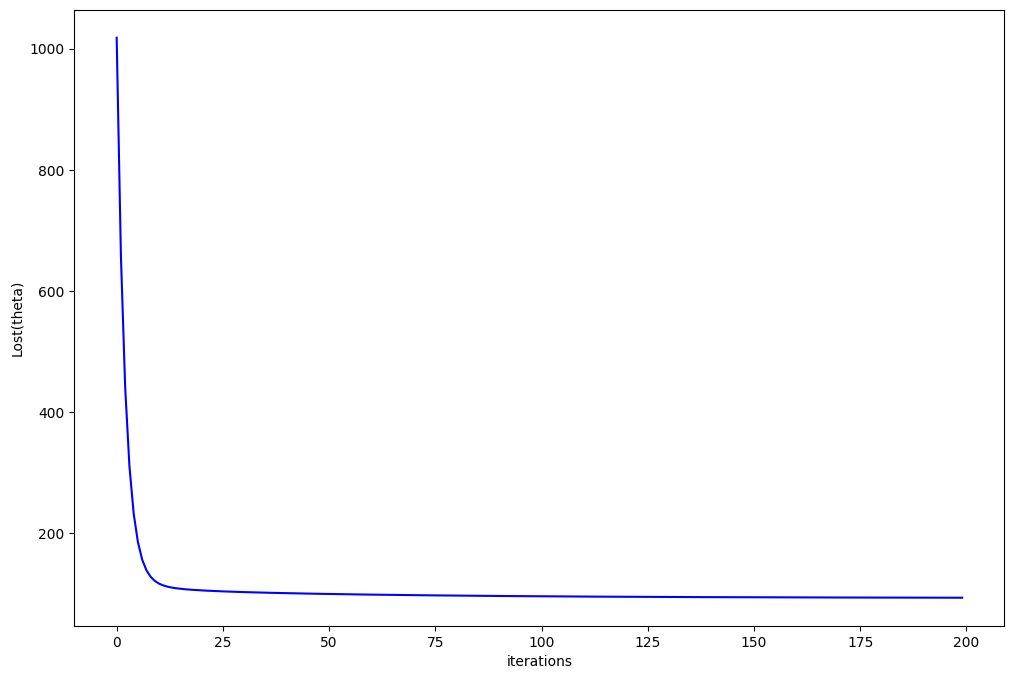

In [26]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('Lost(theta)')
ax.set_xlabel('iterations')
_=ax.plot(range(intera),lost_history,'b')


<p align=justify>La gráfica anterior muestra en número de iteraciones que se necesitan para que la función de costo llegue a su mínimo, se puede apreciar que son necesearias alrededor de 15 itteraciones para llegar al mñinimo, sin embargo se escogio 200 interaciones para que se pueda observar fácilmente el comportamiento del método de GD

#### Datos de validación

In [27]:
phi_grd_valida = np.c_[np.ones((Y_valida_n.shape[0],1)), X_valida_n]
print(phi_grd_valida.shape)

(63, 5)


In [28]:
Ygrd_predi_valida = phi_grd_valida.dot(theta_grd)
Ygrd_predi_valida = Ygrd_predi_valida
Ygrd_ori_valida = Y_valida_n
Xgrd_ori_valida = scaler.inverse_transform(X_valida_n)

<p align=justify> Luego se procede a tomar los datos de validación para este método.

### Métricas

#### Datos de Entrenamiento

In [29]:
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

mse_prueba = mean_squared_error(Ygrd_ori_prueba,Ygrd_predi_prueba)
mae_prueba = mean_absolute_error(Ygrd_ori_prueba,Ygrd_predi_prueba)
rmse_prueba = np.sqrt(mse_prueba)
r_cuadrado_prueba = r2_score(Ygrd_ori_prueba,Ygrd_predi_prueba)

print("MSE = ", mse_prueba)
print("MAE = ", mae_prueba)
print("RMSE = ", rmse_prueba)
print("R^2 = ", r_cuadrado_prueba)

MSE =  93.16155164751842
MAE =  6.876446813583526
RMSE =  9.652023189337996
R^2 =  0.5106032993399375


#### Datos de Validación

In [30]:
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

mse_prueba = mean_squared_error(Ygrd_ori_valida, Ygrd_predi_valida)
mae_valida = mean_absolute_error(Ygrd_ori_valida, Ygrd_predi_valida)
rmse_prueba = np.sqrt(mse_prueba)
r_cuadrado_prueba = r2_score(Ygrd_ori_valida, Ygrd_predi_valida)

print("MSE = ", mse_prueba)
print("MAE = ", mae_valida)
print("RMSE = ", rmse_prueba)
print("R^2 = ", r_cuadrado_prueba)

MSE =  65.67717336572808
MAE =  6.610861079259375
RMSE =  8.104145443273342
R^2 =  0.5706075343972882


<p align=justify>Se puede observar que los valores de las métricas arrojados por este método son muy parecidos a los valores obtenidos con los métodos anteriores, loque ayuda a corroborar que el modelo ajustado se realizado acertadamente. Su interpretación es la misma que la expuesta anteriormente.




# Graficación

<p align=justify> Para la graficación, ya que la presente es una regresión multivariable, se optó por graficar cada una de las variables independientes con respecto a la salida, así que se graficaron los datos de entrenamiento y de validación en cada variable.

<p align=justify>Las siguientes son dos maneras distintas de realizar la graficación de los resultados, la diferencia es que en una de las maneras el código se hace más sencillo ya que se se hace todo dentro de ciclos, mientras qde la manera simmple se hace todo "a pie" ya que se hace referencia cada posición

## Graficación Ciclo

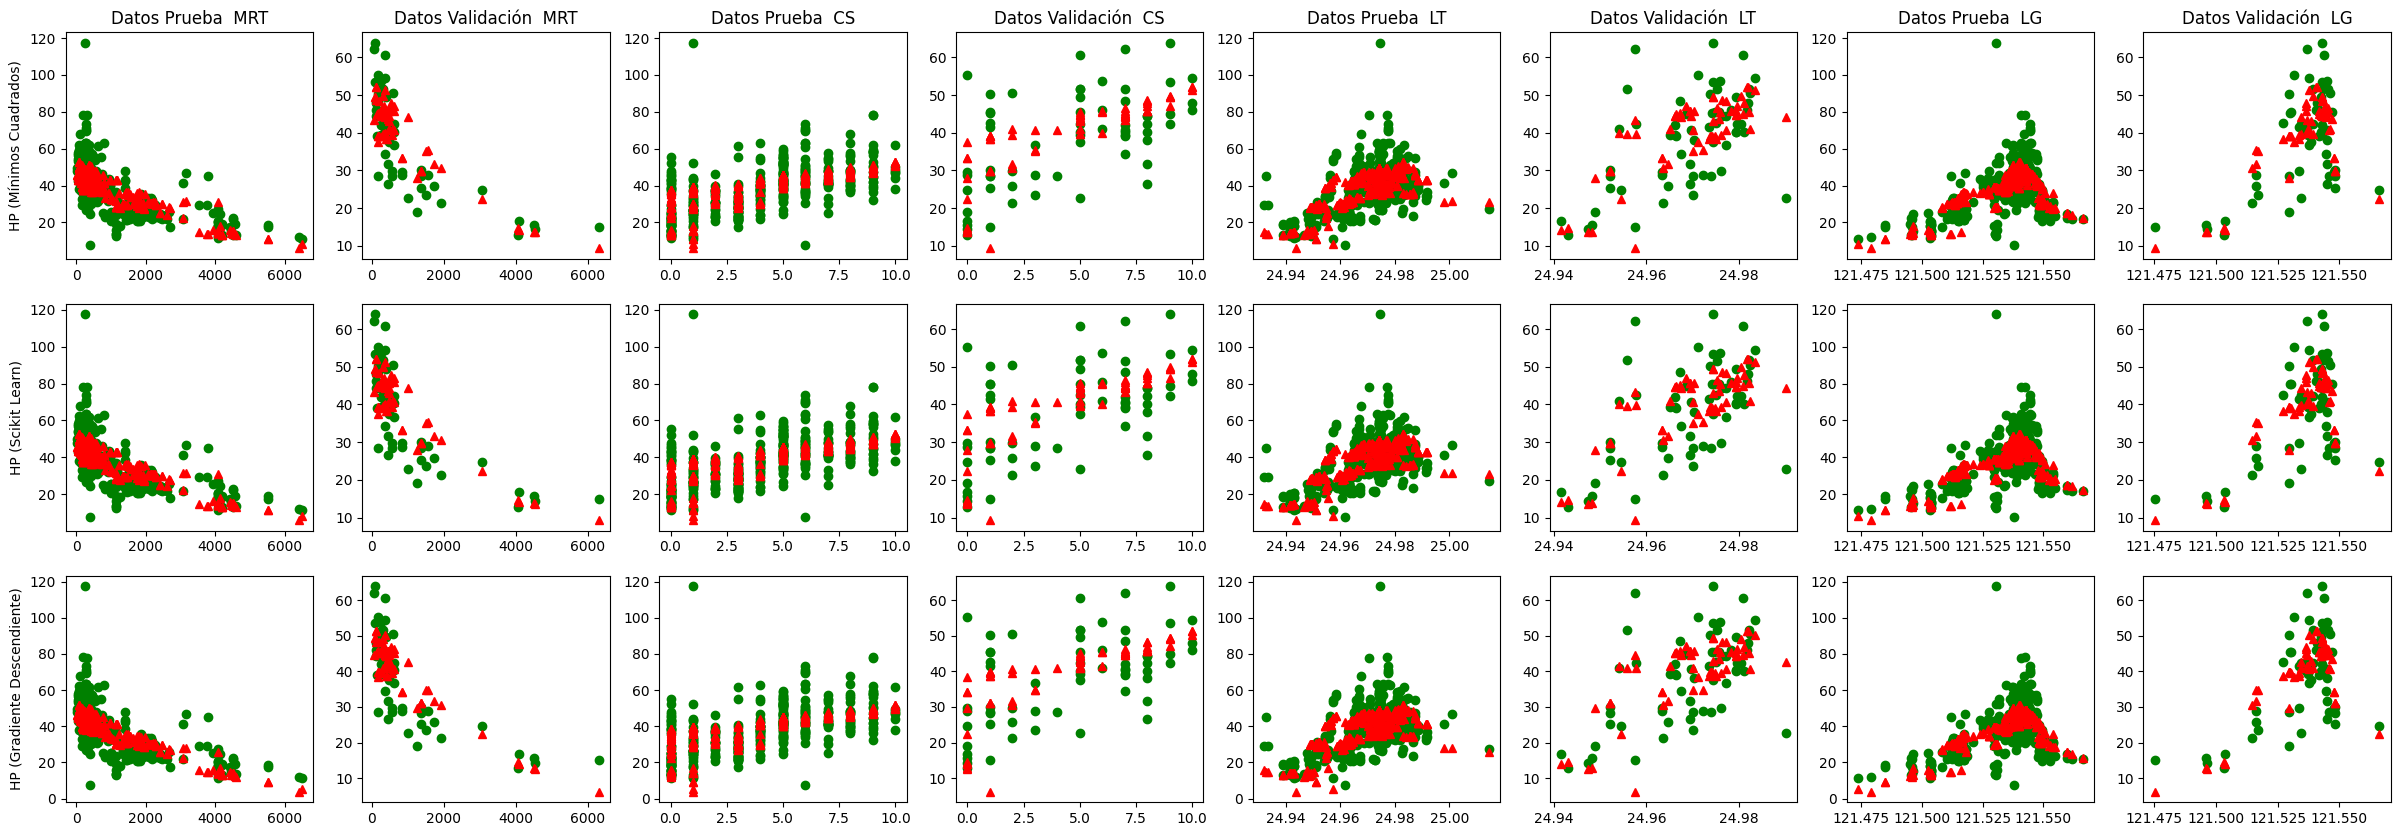

In [31]:
filas = 3
columnas = (xn.shape[1])*2
cont = 0
v = 0
fig,ax = plt.subplots(figsize=(30,10),ncols = columnas, nrows = filas)

# Nombres de los ejes

plt.setp(ax[0, 0], ylabel='HP (Mínimos Cuadrados)')
plt.setp(ax[1, 0], ylabel='HP (Scikit Learn)')
plt.setp(ax[2, 0], ylabel='HP (Gradiente Descendiente)')


ax[0,0].set_title('Datos Prueba  MRT')
ax[0,1].set_title('Datos Validación  MRT')
ax[0,2].set_title('Datos Prueba  CS')
ax[0,3].set_title('Datos Validación  CS')
ax[0,4].set_title('Datos Prueba  LT')
ax[0,5].set_title('Datos Validación  LT')
ax[0,6].set_title('Datos Prueba  LG')
ax[0,7].set_title('Datos Validación  LG')


# matrices
for col in range(columnas):
    if col%2 == 0:
      ax[0,col].plot(Xmc_ori_prueba[:,v], Ymc_ori_prueba, 'go')
      ax[0,col].plot(Xmc_ori_prueba[:,v], Ymc_predi_prueba,'r^')
      cont+=1
    else:
      ax[0,col].plot(Xmc_ori_valida[:,v], Ymc_ori_valida,'go')
      ax[0,col].plot(Xmc_ori_valida[:,v], Ymc_predi_valida,'r^')
      cont+=1
    if cont == 2:
      v += 1
      cont = 0
v=0

#Scikit-Learn

for col in range(columnas):
    if col%2 == 0:
      ax[1,col].plot(Xs_ori_prueba[:,v], Ys_ori_prueba, 'go')
      ax[1,col].plot(Xs_ori_prueba[:,v], Ys_predi_prueba,'r^')
      cont+=1
    else:
       ax[1,col].plot(Xs_ori_valida[:,v],Ys_ori_valida, 'go')
       ax[1,col].plot(Xs_ori_valida[:,v],Ys_predi_valida,'r^')
       cont+=1
    if cont == 2:
      v += 1
      cont = 0
v=0

#Gradiente

for col in range(columnas):
    if col%2 == 0:
      ax[2,col].plot(Xgrd_ori_prueba[:,v],Ygrd_ori_prueba, 'go')
      ax[2,col].plot(Xgrd_ori_prueba[:,v],Ygrd_predi_prueba,'r^')
      cont+=1
    else:
       ax[2,col].plot(Xgrd_ori_valida[:,v], Ygrd_ori_valida, 'go')
       ax[2,col].plot(Xgrd_ori_valida[:,v], Ygrd_predi_valida,'r^')
       cont+=1
    if cont == 2:
      v += 1
      cont = 0

plt.show()


## Graficación simple

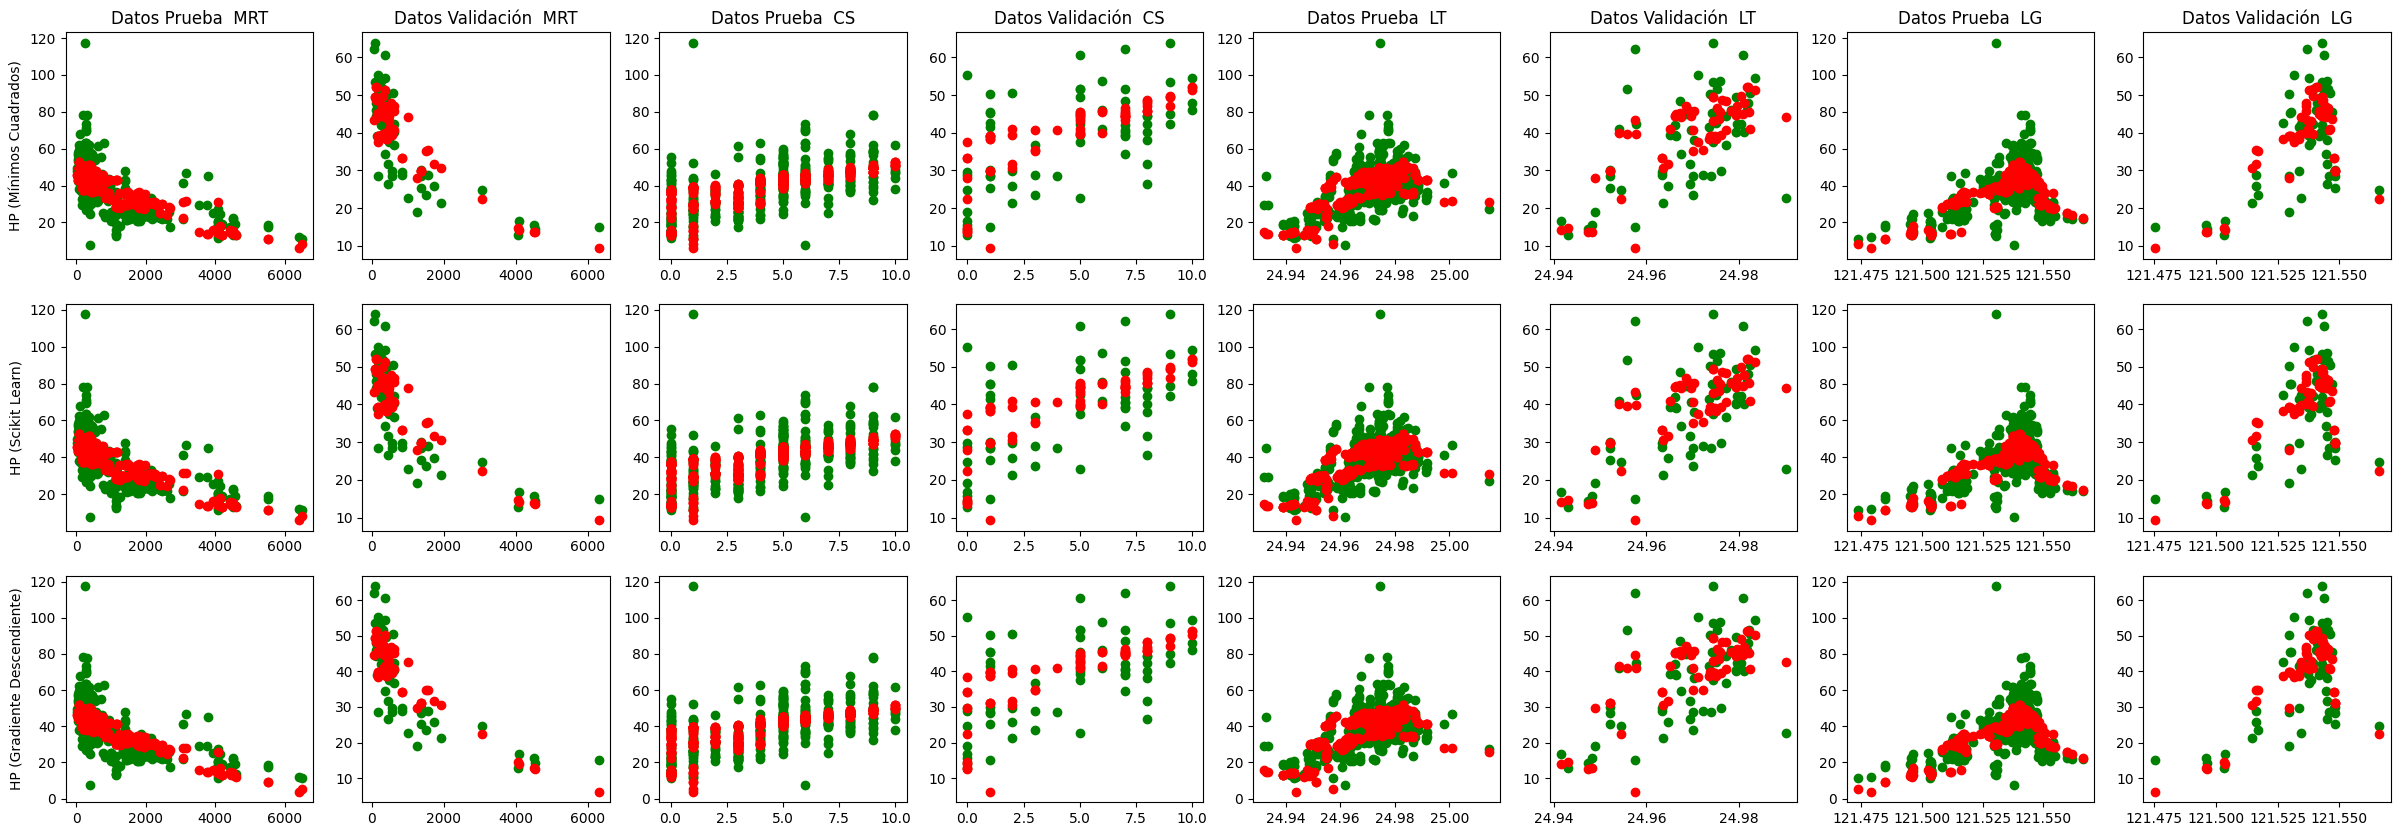

In [32]:
metodos = 3

fig,ax = plt.subplots(figsize=(30,10),ncols=(xn.shape[1])*2,nrows=metodos)

#fig,ax = plt.subplots(3,3, figsize=(15, 8), sharex=True, sharey=True)


# Nombres de los ejes
plt.setp(ax[0, 0], ylabel='HP (Mínimos Cuadrados)')
plt.setp(ax[1, 0], ylabel='HP (Scikit Learn)')
plt.setp(ax[2, 0], ylabel='HP (Gradiente Descendiente)')


ax[0,0].set_title('Datos Prueba  MRT')
ax[0,1].set_title('Datos Validación  MRT')
ax[0,2].set_title('Datos Prueba  CS')
ax[0,3].set_title('Datos Validación  CS')
ax[0,4].set_title('Datos Prueba  LT')
ax[0,5].set_title('Datos Validación  LT')
ax[0,6].set_title('Datos Prueba  LG')
ax[0,7].set_title('Datos Validación  LG')



ax[0,0].plot(Xmc_ori_prueba[:,0],Ymc_ori_prueba,'go')
ax[0,0].plot(Xmc_ori_prueba[:,0],Ymc_predi_prueba,'ro')
ax[0,1].plot(Xmc_ori_valida[:,0],Ymc_ori_valida,'go')
ax[0,1].plot(Xmc_ori_valida[:,0],Ymc_predi_valida,'ro')


ax[0,2].plot(Xmc_ori_prueba[:,1],Ymc_ori_prueba,'go')
ax[0,2].plot(Xmc_ori_prueba[:,1],Ymc_predi_prueba,'ro')
ax[0,3].plot(Xmc_ori_valida[:,1],Ymc_ori_valida,'go')
ax[0,3].plot(Xmc_ori_valida[:,1],Ymc_predi_valida,'ro')


ax[0,4].plot(Xmc_ori_prueba[:,2],Ymc_ori_prueba,'go')
ax[0,4].plot(Xmc_ori_prueba[:,2],Ymc_predi_prueba,'ro')
ax[0,5].plot(Xmc_ori_valida[:,2],Ymc_ori_valida,'go')
ax[0,5].plot(Xmc_ori_valida[:,2],Ymc_predi_valida,'ro')


ax[0,6].plot(Xmc_ori_prueba[:,3],Ymc_ori_prueba,'go')
ax[0,6].plot(Xmc_ori_prueba[:,3],Ymc_predi_prueba,'ro')
ax[0,7].plot(Xmc_ori_valida[:,3],Ymc_ori_valida,'go')
ax[0,7].plot(Xmc_ori_valida[:,3],Ymc_predi_valida,'ro')

#Scikit-learn


ax[1,0].plot(Xs_ori_prueba[:,0],Ys_ori_prueba,'go')
ax[1,0].plot(Xs_ori_prueba[:,0],Ys_predi_prueba,'ro')
ax[1,1].plot(Xs_ori_valida[:,0],Ys_ori_valida,'go')
ax[1,1].plot(Xs_ori_valida[:,0],Ys_predi_valida,'ro')


ax[1,2].plot(Xs_ori_prueba[:,1],Ys_ori_prueba,'go')
ax[1,2].plot(Xs_ori_prueba[:,1],Ys_predi_prueba,'ro')
ax[1,3].plot(Xs_ori_valida[:,1],Ys_ori_valida,'go')
ax[1,3].plot(Xs_ori_valida[:,1],Ys_predi_valida,'ro')


ax[1,4].plot(Xs_ori_prueba[:,2],Ys_ori_prueba,'go')
ax[1,4].plot(Xs_ori_prueba[:,2],Ys_predi_prueba,'ro')
ax[1,5].plot(Xs_ori_valida[:,2],Ys_ori_valida,'go')
ax[1,5].plot(Xs_ori_valida[:,2],Ys_predi_valida,'ro')

ax[1,6].plot(Xs_ori_prueba[:,3],Ys_ori_prueba,'go')
ax[1,6].plot(Xs_ori_prueba[:,3],Ys_predi_prueba,'ro')
ax[1,7].plot(Xs_ori_valida[:,3],Ys_ori_valida,'go')
ax[1,7].plot(Xs_ori_valida[:,3],Ys_predi_valida,'ro')


#Gradiente Descendente


ax[2,0].plot(Xgrd_ori_prueba[:,0],Ygrd_ori_prueba,'go')
ax[2,0].plot(Xgrd_ori_prueba[:,0],Ygrd_predi_prueba,'ro')
ax[2,1].plot(Xgrd_ori_valida[:,0],Ygrd_ori_valida,'go')
ax[2,1].plot(Xgrd_ori_valida[:,0],Ygrd_predi_valida,'ro')


ax[2,2].plot(Xgrd_ori_prueba[:,1],Ygrd_ori_prueba,'go')
ax[2,2].plot(Xgrd_ori_prueba[:,1],Ygrd_predi_prueba,'ro')
ax[2,3].plot(Xgrd_ori_valida[:,1],Ygrd_ori_valida,'go')
ax[2,3].plot(Xgrd_ori_valida[:,1],Ygrd_predi_valida,'ro')


ax[2,4].plot(Xgrd_ori_prueba[:,2],Ygrd_ori_prueba,'go')
ax[2,4].plot(Xgrd_ori_prueba[:,2],Ygrd_predi_prueba,'ro')
ax[2,5].plot(Xgrd_ori_valida[:,2],Ygrd_ori_valida,'go')
ax[2,5].plot(Xgrd_ori_valida[:,2],Ygrd_predi_valida,'ro')


ax[2,6].plot(Xgrd_ori_prueba[:,3],Ygrd_ori_prueba,'go')
ax[2,6].plot(Xgrd_ori_prueba[:,3],Ygrd_predi_prueba,'ro')
ax[2,7].plot(Xgrd_ori_valida[:,3],Ygrd_ori_valida,'go')
ax[2,7].plot(Xgrd_ori_valida[:,3],Ygrd_predi_valida,'ro')

plt.show()

<p align=justify>Como se puedo observar, las filas corresopnden a los diferentes métodos usados y las columnas representan las diferentes variables tomadas en cuenta. Los ejes X's de las gráficas representan las variables con sus datos de validación o entrenamiento y el eje Y representa la salida (precio de la casa) de acuerdo a cada método usado.

<p align=justify>Los dos códigos arrojan las mismas gráficas, los puntos verdes corresponden a los valores originales del Dataset y los puntos rojos corresopnden a los valores de la predicción, si el modelo ajustado de regresión que se encontró hubiese tenido un R^2 mayor, seguramente los puntos rojos se sobrepondrían casi que perfecto en elos puntos verdes.
Sin embargo, las gráficas reflejan los valores que se obtuvieron en las métricas de cada uno de los métodos, en la mayoría de los casos el R^2 no superada el 58% por tanto la predicción no es tan precisa.

#Conclusiones

* <p align=justify> Como se pudo evidenciar en las parte gráfica y en los valores arrojados por las métricas de los diferentes métodos, el modelo ajustado encontrado no es del todo fiable, por lo tanto, no se puede esperar una predicción exacta del valor de las casas en relación con la variabilidad de las variables independientes MRT, CS, LT y LG.

* <p align=justify> El haber realizado la regresión por diferentes métodos, ayudó para corroborar los datos que se iban obteniendo, sin embargo, como se constanto que los valores de los coeficientes no variaron mucho entre un método y otro, se debe optar po utilizar el método que menor tiempo emplee para implementarse, en en este caso, el método de Scikit-Learn.

* <p align=justify> A pesar de que el método de scikit-Learn es el más rápido de implementar, no se debe desmeritar los otros dos métodos, ya que todos tienen su utilidad, por ejemplo, con el método de Minimos cuadrados, se pueden obtener algunos datos que sirven para evaluar algunas pruebas de hipótesis y de esta manera conocer e interpretar mucho mejor las bases de datos, por otro lado el método de GD puede ser mucho más preciso en cuando a valores de los coeficientes y arrojó mejor resultado en cuanto a las métricas obtenidas.

* <p align=justify> Se debe tener muy en cuenta el contecto dentro del cual se está trabajando para así poder determinar a partir de qué valor de R^2 se aceptará el modelo, por ejemplo si se está hablando de sensores o procesos de instrumentación, los valores de dicha métrica deben ser casi que uno ya que se está hablando de un sensor y esto puede afectar a un proceso de control y por tanto alterar el comportamiento de alguna máquina y generar daños millonarios; mientras que por otro lado para otras aplicaciones, un valor de R^2 de 0.8 es permicible ya que el error aceptable en la salida es de mayor rango. Para este caso en específico, ya que se está hablando de que la salida es un valor monetario, se debe considerar un valor de R^2 de mínimo 0.85 porque no es lo miso que una casa cueste 300 USD a que cueste 1500 USD, por tanto, este modelo no es el mejor si lo que quiere es predecir el precio de las casa en Taiwan para una posible compra.